In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [4]:
# Load your dataset (assuming it's in a CSV format)
data = pd.read_csv('train_data (1).csv')


In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.head()

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [10]:
data.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [14]:
data.dropna(axis=0,inplace=True)

In [15]:
data.shape

(811, 2)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [18]:
data = data.drop(['Date'], axis=1)


In [19]:
X = data.drop('Petrol (USD)', axis=1)  # Features excluding 'price'
y = data['Petrol (USD)']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 163.2435133128509
R-squared: 0.5408228631319244


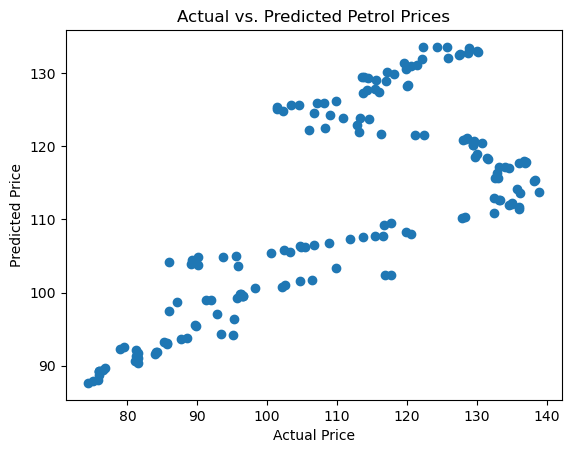

In [22]:
# Plot actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Petrol Prices")
plt.show()

# SVR

Mean Squared Error: 163.31616186097125


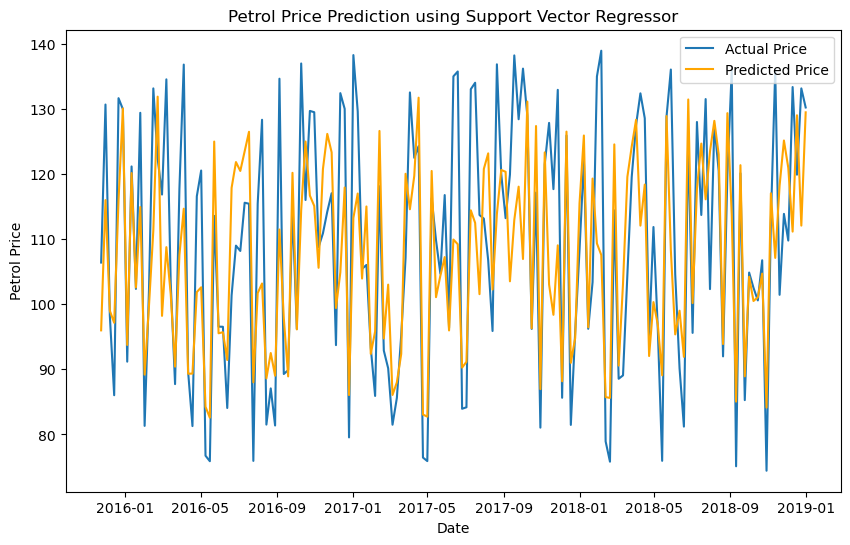

In [58]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Price')
plt.plot(test_data.index, y_pred, label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Prediction using Support Vector Regressor')
plt.legend()
plt.show()


# Decision Tree

Mean Squared Error: 1.269706329113924


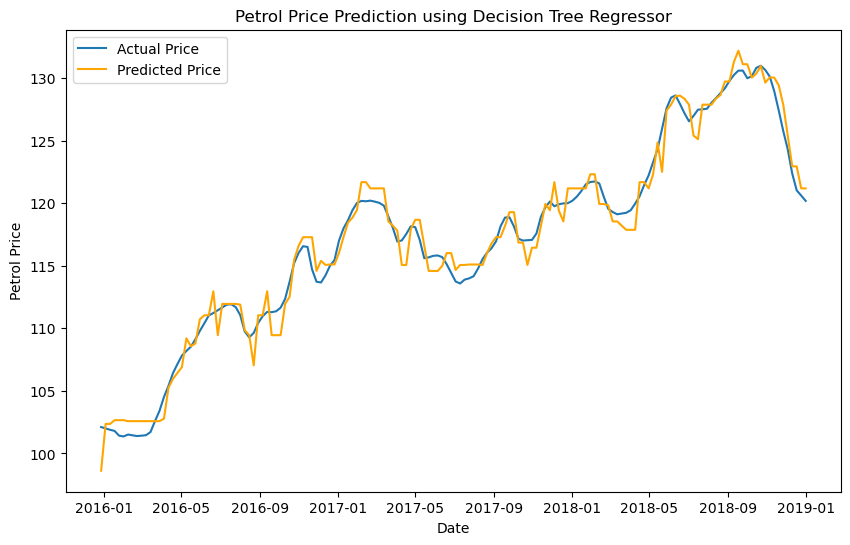

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Load your dataset (assuming it's in a CSV format)
data = pd.read_csv('train_data (1).csv')

# Assuming your date column is named 'Date' and 'price' column has petrol prices

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Prepare the data
ts_data = data['Petrol (USD)']

# Train-test split
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Create lag features for time series data
def create_lag_features(data, lag):
    for i in range(1, lag + 1):
        data[f'lag_{i}'] = data['Petrol (USD)'].shift(i)
    return data

lag = 5  # Number of lag features
train_data = create_lag_features(train_data.to_frame(), lag).dropna()
test_data = create_lag_features(test_data.to_frame(), lag).dropna()

# Split data into features and target variable
X_train, y_train = train_data.drop('Petrol (USD)', axis=1), train_data['Petrol (USD)']
X_test, y_test = test_data.drop('Petrol (USD)', axis=1), test_data['Petrol (USD)']

# Create and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Price')
plt.plot(test_data.index, y_pred, label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Prediction using Decision Tree Regressor')
plt.legend()
plt.show()
